In [94]:
import numpy as np
import pandas as pd
import math 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

<h3>Importing the Data<h3
                         >

In [95]:
df = pd.read_csv("data/train.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,8.754
1,1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,7.492
2,2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,9.010
3,3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,6.227
4,4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,8.314


In [96]:
df.drop(['id'], axis=1, inplace= True)


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.1+ MB


In [98]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [99]:
df.describe()


,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798543,61.746491,57.455736,5.731269,5.735275,3.539063,7.785853
std,0.475739,1.437124,2.228678,1.125312,1.154908,0.711317,1.016600
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,5.787000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,6.851000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,7.785000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,8.581500
max,5.010000,79.000000,79.000000,10.740000,58.900000,31.800000,9.843000


<h3> After exploring the data..i noticed some diamonds had 0 values in the X, Y or Z columns. So I will drop this data after looking at the correlation Heatmap next.</h3>

In [100]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
2680,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,8.508
5230,2.80,Good,G,SI2,63.8,58.0,8.90,8.85,0.0,9.841
7545,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0,8.252
8222,1.56,Ideal,G,VS2,62.2,54.0,0.00,0.00,0.0,9.457
9446,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0,8.545
10022,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,8.061
15901,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,7.664
17496,2.25,Premium,H,SI2,62.8,59.0,0.00,0.00,0.0,9.800
17688,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,9.444
20593,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,9.810


<h3>Correlation Heatmap</h3>

<AxesSubplot:>

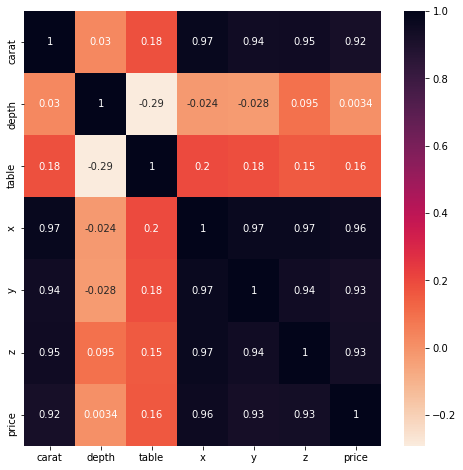

In [101]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True, cmap="rocket_r")

<h3>X Y Z seem to have a high correlation with the price of the diamond.  I will drop these columns as well. </h3>

In [102]:
df.drop(['x','y','z'], axis=1, inplace= True)

<h3>Turning the categorical columns into numerical based on the importance over the diamonds price</h3>

In [103]:
clarity = {
    "IF": 4,
    "VVS1": 3.5,
    "VVS2": 3,
    "VS1": 2.5,
    "VS2": 2,
    "SI1": 1.5,
    "SI2": 1,
    "I1": .5
}
df["clarity"] = df.clarity.map(clarity)
df

,carat,cut,color,clarity,depth,table,price
0,1.01,Premium,G,2.5,62.7,58.0,8.754
1,0.60,Good,G,2.0,64.3,57.0,7.492
2,1.60,Premium,H,1.0,59.4,59.0,9.010
3,0.30,Very Good,J,2.5,63.5,58.0,6.227
4,1.00,Very Good,F,1.0,62.8,57.0,8.314
...,...,...,...,...,...,...,...
40450,0.51,Ideal,E,2.0,62.5,55.0,7.412
40451,0.80,Ideal,H,2.0,62.1,54.0,8.016
40452,1.53,Premium,G,1.0,58.7,59.0,9.070
40453,1.51,Ideal,I,2.0,61.6,54.0,9.199


In [104]:
cut = {
    "Ideal": 2.5,
    "Premium": 2,
    "Very Good": 1.5,
    "Good": 1,
    "Fair": .5
}
df["cut"] = df.cut.map(cut)
df

,carat,cut,color,clarity,depth,table,price
0,1.01,2.0,G,2.5,62.7,58.0,8.754
1,0.60,1.0,G,2.0,64.3,57.0,7.492
2,1.60,2.0,H,1.0,59.4,59.0,9.010
3,0.30,1.5,J,2.5,63.5,58.0,6.227
4,1.00,1.5,F,1.0,62.8,57.0,8.314
...,...,...,...,...,...,...,...
40450,0.51,2.5,E,2.0,62.5,55.0,7.412
40451,0.80,2.5,H,2.0,62.1,54.0,8.016
40452,1.53,2.0,G,1.0,58.7,59.0,9.070
40453,1.51,2.5,I,2.0,61.6,54.0,9.199


In [105]:
color = {
    "D": 3.5,
    "E": 3,
    "F": 2.5,
    "G": 2,
    "H": 1.5,
    "I": 1,
    "J": .5
}
df["color"] = df.color.map(color)
df

,carat,cut,color,clarity,depth,table,price
0,1.01,2.0,2.0,2.5,62.7,58.0,8.754
1,0.60,1.0,2.0,2.0,64.3,57.0,7.492
2,1.60,2.0,1.5,1.0,59.4,59.0,9.010
3,0.30,1.5,0.5,2.5,63.5,58.0,6.227
4,1.00,1.5,2.5,1.0,62.8,57.0,8.314
...,...,...,...,...,...,...,...
40450,0.51,2.5,3.0,2.0,62.5,55.0,7.412
40451,0.80,2.5,1.5,2.0,62.1,54.0,8.016
40452,1.53,2.0,2.0,1.0,58.7,59.0,9.070
40453,1.51,2.5,1.0,2.0,61.6,54.0,9.199


<h3>Gridsearch with a Random Forrest Model</h3>

In [42]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=27)

In [43]:
model = RandomForestRegressor()

params = {'n_estimators': [100,300,500],
          'max_features': ['sqrt', 0.5],
          'max_depth': [10, 30, 100],
          'min_samples_leaf': [1, 3, 10]}

grid_search = GridSearchCV(model, param_grid=params, verbose=1, n_jobs=-1,cv=5)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 100],
                         'max_features': ['sqrt', 0.5],
                         'min_samples_leaf': [1, 3, 10],
                         'n_estimators': [100, 300, 500]},
             verbose=1)

In [84]:
bestscore = grid_search.best_score_
print("Best GridSearch Score: ", bestscore)
best_rf = grid_search.best_estimator_
print("Best Estimator: ", best_rf)
print("Best RF SCORE: ", best_rf.score(X, y))


Best GridSearch Score:  0.9895638071949323
Best Estimator:  RandomForestRegressor(max_depth=100, max_features=0.5, min_samples_leaf=3,
                      n_estimators=300)
Best RF SCORE:  0.9932774401819134


<h3>Predicting the Test Data</h3>

In [69]:
dftest = pd.read_csv("data/test.csv")
dftest

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,2.01,Ideal,H,SI1,61.9,57.0,8.14,8.05,5.01
1,1,0.49,Good,D,VS1,57.5,60.0,5.18,5.25,3.00
2,2,1.03,Premium,F,SI1,58.6,62.0,6.65,6.60,3.88
3,3,0.90,Very Good,E,SI1,63.0,56.0,6.11,6.15,3.86
4,4,0.59,Ideal,D,SI1,62.5,55.0,5.35,5.40,3.36
...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.41,Good,F,I1,63.8,57.0,4.72,4.69,3.00
13481,13481,2.05,Very Good,H,VS2,63.5,62.0,8.05,7.91,5.07
13482,13482,2.22,Premium,I,VS2,60.5,59.0,8.41,8.37,5.08
13483,13483,0.51,Ideal,E,SI2,58.3,62.0,5.20,5.19,3.04


In [70]:
dftest.drop(['id'], axis=1, inplace= True)
dftest.drop(['x','y','z'], axis=1, inplace= True)

In [71]:
dftest["clarity"] = dftest.clarity.map(clarity)
dftest["cut"] = dftest.cut.map(cut)
dftest["color"] = dftest.color.map(color)


In [72]:
dftest["price"] = best_rf.predict(dftest)
dftest

,carat,cut,color,clarity,depth,table,price
0,2.01,2.5,1.5,1.5,61.9,57.0,9.718114
1,0.49,1.0,3.5,2.5,57.5,60.0,7.276378
2,1.03,2.0,2.5,1.5,58.6,62.0,8.548283
3,0.90,1.5,3.0,1.5,63.0,56.0,8.336532
4,0.59,2.5,3.5,1.5,62.5,55.0,7.482671
...,...,...,...,...,...,...,...
13480,0.41,1.0,2.5,0.5,63.8,57.0,6.411075
13481,2.05,1.5,1.5,2.0,63.5,62.0,9.642398
13482,2.22,2.0,1.0,2.0,60.5,59.0,9.745713
13483,0.51,2.5,3.0,1.0,58.3,62.0,7.089866


In [73]:
dfsubmit = dftest[["price"]]
dfsubmit.index.name = 'id'

In [74]:
dfsubmit.to_csv("submit.csv", index = True)